<a href="https://colab.research.google.com/github/mintumovi/Intruder-Detection-Under-Home-Premises/blob/main/Copy_of_segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install torch torchvision
!pip install pyyaml cython
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

# Clone the Detectron2 repository and install it
!git clone https://github.com/facebookresearch/detectron2.git
%cd detectron2
!pip install -e .

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.7 MB/s eta 0:00:00
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-ftb0yrwm
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-ftb0yrwm
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=376059 sha256=faa93735d326e37b0b0dd2678406845dd630acf635aecad206d7c87a8b41d7e7
  Stored in directory: /tmp/pip-ephem-wheel-cache-av1ygeox/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
Cloning into 'detectron2'...
remote: Enumerating objects: 15806, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 15806 (delta 22), reused 38 (delta 9), pack-reused 15743 (f

In [ ]:

# Import necessary libraries
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer, ColorMode

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the dataset
#dataset_path = '/content/drive/MyDrive/Data/Class 1: Waste Collection/FramesWithHumans/'

#dataset_path = '/content/drive/MyDrive/Data/Class 2 & 3:  Postal and Utility Services/FramesWithHumans/'

#dataset_path = '/content/drive/MyDrive/Data/Class 4: Guest Visits/FramesWithHumans3 A1/'
#dataset_path = '/content/drive/MyDrive/Data/Class 4: Guest Visits/FramesWithHumans3 A2/'
#dataset_path = '/content/drive/MyDrive/Data/Class 4: Guest Visits/FramesWithHumans3 A3/'
#dataset_path = '/content/drive/MyDrive/Data/Class 4: Guest Visits/FramesWithHumans/'

#dataset_path = '/content/drive/MyDrive/Data/Class 5: Family Interactions/FramesWithHumans/'

#dataset_path = '/content/drive/MyDrive/Data/Class 6: Household Services/FramesWithHumans/'

#dataset_path = '/content/drive/MyDrive/Data/Class 7:  Vehicle Services/FramesWithHumans9 A1/'
#dataset_path = '/content/drive/MyDrive/Data/Class 7:  Vehicle Services/FramesWithHumans9 A2/'
#dataset_path = '/content/drive/MyDrive/Data/Class 7:  Vehicle Services/FramesWithHumans9 A3/'

#dataset_path = '/content/drive/MyDrive/Data/Class 8: Financial Transactions/FramesWithHumans/'

#dataset_path = '/content/drive/MyDrive/Data/Class 9: Newspaper Delivery /FramesWithHumans/'

#dataset_path = '/content/drive/MyDrive/Data/Class 10: Delivery Services/FramesWithHumans14 A1/'
#dataset_path = '/content/drive/MyDrive/Data/Class 10: Delivery Services/FramesWithHumans14 A2/'
#dataset_path = '/content/drive/MyDrive/Data/Class 10: Delivery Services/FramesWithHumans14 A3/'

#dataset_path = '/content/drive/MyDrive/Data/Class 11: Security Incidents/FramesWithHumans12 A1/'
#dataset_path = '/content/drive/MyDrive/Data/Class 11: Security Incidents/FramesWithHumans12 A2/'
#dataset_path = '/content/drive/MyDrive/Data/Class 11: Security Incidents/FramesWithHumans12 A3/'

#dataset_path = '/content/drive/MyDrive/Data/Class 12: Restricted Area /FramesWithHumans1/'
#dataset_path = '/content/drive/MyDrive/Data/Class 12: Restricted Area /FramesWithHumans2/'
dataset_path = '/content/drive/MyDrive/Data/Class 12: Restricted Area /FramesWithHumans3/'

# Load all image paths
image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith('.jpg')]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Configure the Detectron2 model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set the threshold for this model
cfg.MODEL.DEVICE = "cpu"  # Use CPU
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

# Define a function to generate random colors
def random_color():
    return [int(x) for x in np.random.choice(range(256), size=3)]

# Process each image
for image_file in image_files:
    # Read the image
    image = cv2.imread(image_file)

    # Make predictions
    outputs = predictor(image)

    # Visualize the predictions
    v = Visualizer(image[:, :, ::-1],
                   metadata=None,
                   scale=1.2,
                   instance_mode=ColorMode.IMAGE_BW
    )
    instances = outputs["instances"].to("cpu")

    # Filter instances to only include humans (class ID 0)
    human_instances = instances[instances.pred_classes == 0]

    # Assign a distinct color to each detected person
    colors = [random_color() for _ in range(len(human_instances))]

    # Draw the bounding boxes
    for i, box in enumerate(human_instances.pred_boxes):
        color = colors[i]
        start_point = (int(box[0]), int(box[1]))
        end_point = (int(box[2]), int(box[3]))
        image = cv2.rectangle(image, start_point, end_point, color, 2)

    # Display the result
    cv2_imshow(image)

    # Uncomment the line below if you want to save the output image
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 1: Waste Collection/Segment/', os.path.basename(image_file)), image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 2 & 3:  Postal and Utility Services/Segment/', os.path.basename(image_file)), image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 4: Guest Visits/Segment/', os.path.basename(image_file)), image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 4: Guest Visits/Segment1/', os.path.basename(image_file)), image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 4: Guest Visits/Segment2/', os.path.basename(image_file)), image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 4: Guest Visits/Segmentt/', os.path.basename(image_file)), image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 5: Family Interactions/Segment/', os.path.basename(image_file)), image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 6: Household Services/Segment/', os.path.basename(image_file)), image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 7:  Vehicle Services/Segment/', os.path.basename(image_file)), image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 7:  Vehicle Services/Segment1/', os.path.basename(image_file)), image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 7:  Vehicle Services/Segment2/', os.path.basename(image_file)), image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 8: Financial Transactions/Segment/', os.path.basename(image_file)), image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 9: Newspaper Delivery /Segment/', os.path.basename(image_file)), image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 10: Delivery Services/Segment/', os.path.basename(image_file)), image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 10: Delivery Services/Segment1/', os.path.basename(image_file)), image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 10: Delivery Services/Segment2/', os.path.basename(image_file)), image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 11: Security Incidents/Segment/', os.path.basename(image_file)), image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 11: Security Incidents/Segment1/', os.path.basename(image_file)), image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 11: Security Incidents/Segment2/', os.path.basename(image_file)), image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 12: Restricted Area /Segment/', os.path.basename(image_file)), image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 12: Restricted Area /Segment1/', os.path.basename(image_file)), image)
    cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 12: Restricted Area /Segment2/', os.path.basename(image_file)), image)





In [ ]:
# Configure the Detectron2 model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set the threshold for this model
cfg.MODEL.DEVICE = "cpu"  # Use CPU
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

# Define a function to generate random colors
def random_color():
    return [int(x) for x in np.random.choice(range(256), size=3)]

# Process each image
for image_file in image_files:
    # Read the image
    image = cv2.imread(image_file)

    # Make predictions
    outputs = predictor(image)

    # Visualize the predictions with masks
    v = Visualizer(image[:, :, ::-1],
                   metadata=None,
                   scale=1.2,
                   instance_mode=ColorMode.IMAGE_BW  # Set image background to black and white
    )

    instances = outputs["instances"].to("cpu")

    # Filter instances to only include humans (class ID 0)
    human_instances = instances[instances.pred_classes == 0]

    # Draw masks with random colors
    v = v.draw_instance_predictions(human_instances)

    # Get the final output image with masks
    output_image = v.get_image()[:, :, ::-1]

    # Display the result
    cv2_imshow(output_image)

    # Uncomment the line below if you want to save the output image
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 1: Waste Collection/Mask/', os.path.basename(image_file)), output_image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 2 & 3:  Postal and Utility Services/Mask/', os.path.basename(image_file)), output_image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 4: Guest Visits/Mask/', os.path.basename(image_file)), output_image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 4: Guest Visits/Mask1/', os.path.basename(image_file)), output_image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 4: Guest Visits/Mask2/', os.path.basename(image_file)), output_image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 4: Guest Visits/Maskk/', os.path.basename(image_file)), output_image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 5: Family Interactions/Mask/', os.path.basename(image_file)), output_image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 6: Household Services/Mask/', os.path.basename(image_file)), output_image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 7:  Vehicle Services/Mask/', os.path.basename(image_file)), output_image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 7:  Vehicle Services/Mask1/', os.path.basename(image_file)), output_image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 7:  Vehicle Services/Mask2/', os.path.basename(image_file)), output_image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 8: Financial Transactions/Mask/', os.path.basename(image_file)), output_image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 9: Newspaper Delivery /Mask/', os.path.basename(image_file)), output_image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 10: Delivery Services/Mask/', os.path.basename(image_file)), output_image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 10: Delivery Services/Mask1/', os.path.basename(image_file)), output_image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 10: Delivery Services/Mask2/', os.path.basename(image_file)), output_image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 11: Security Incidents/Mask/', os.path.basename(image_file)), output_image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 11: Security Incidents/Mask1/', os.path.basename(image_file)), output_image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 11: Security Incidents/Mask2/', os.path.basename(image_file)), output_image)

    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 12: Restricted Area /Mask/', os.path.basename(image_file)), output_image)
    #cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 12: Restricted Area /Mask1/', os.path.basename(image_file)), output_image)
    cv2.imwrite(os.path.join('/content/drive/MyDrive/Data/Class 12: Restricted Area /Mask2/', os.path.basename(image_file)), output_image)



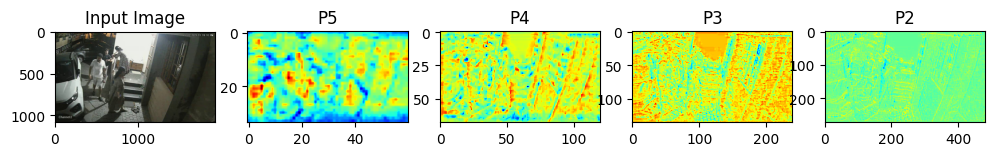

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.config import get_cfg
from detectron2 import model_zoo

# Load the model configuration and pre-trained weights
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cpu"  # Using CPU for inference

# Build the model and load weights
model = build_model(cfg)
model.eval()  # Set model to evaluation mode
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)

# Register hooks to capture feature maps
feature_maps = {}

def get_activation(name):
    def hook(model, input, output):
        feature_maps[name] = output.detach().cpu().numpy()
    return hook

# Hook the FPN layers (P2 to P6) or any other layer you need
model.backbone.fpn_lateral2.register_forward_hook(get_activation('P2'))
model.backbone.fpn_lateral3.register_forward_hook(get_activation('P3'))
model.backbone.fpn_lateral4.register_forward_hook(get_activation('P4'))
model.backbone.fpn_lateral5.register_forward_hook(get_activation('P5'))

# Load and preprocess your input image
image_file = "/content/drive/MyDrive/Data/A2/Channel2-Segmentation/FramesWithHumans12/frame_16875.jpg"
image = cv2.imread(image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to the expected format (tensor)
inputs = [{"image": torch.as_tensor(image.astype("float32").transpose(2, 0, 1))}]

# Pass the image through the model
with torch.no_grad():
    model(inputs)

# Visualize the feature maps
def plot_feature_maps(feature_maps, num_maps=4):
    plt.figure(figsize=(12, 8))

    # Display the input image
    plt.subplot(2, num_maps + 1, 1)
    plt.imshow(image)
    plt.title('Input Image')

    # Display feature maps for each layer
    for i, (layer, fmap) in enumerate(feature_maps.items(), 2):
        fmap = np.mean(fmap[0], axis=0)  # Taking the average across channels
        plt.subplot(2, num_maps + 1, i)
        plt.imshow(fmap, cmap='jet')
        plt.title(layer)

    plt.show()

# Plot the extracted feature maps
plot_feature_maps(feature_maps)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


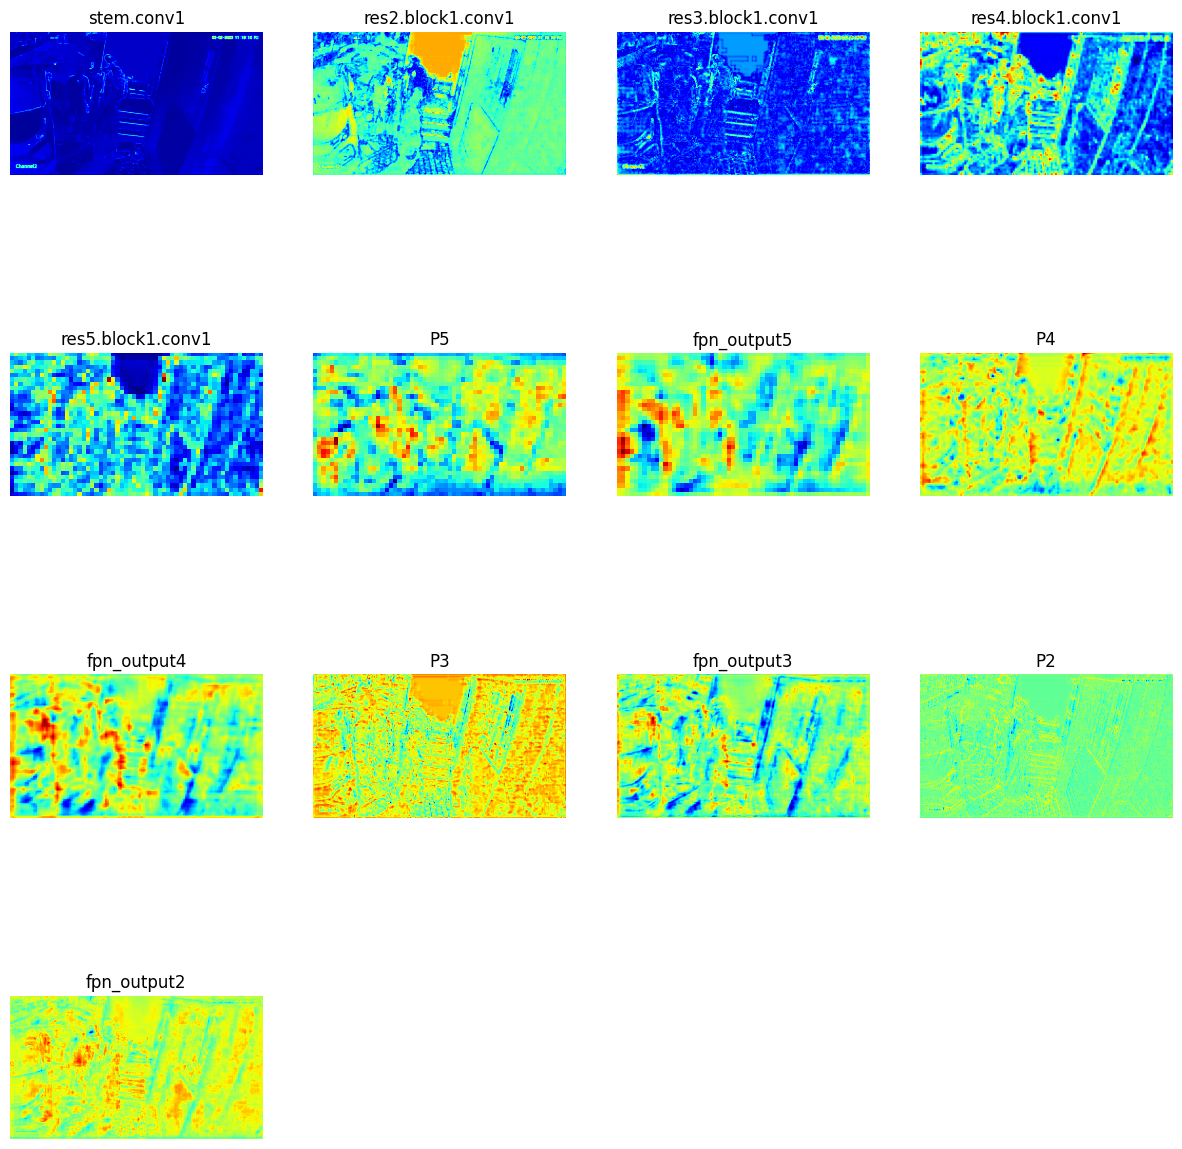

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from google.colab import drive
drive.mount('/content/drive')


# Load the model configuration and pre-trained weights
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cpu"  # Using CPU for inference

# Build the model and load weights
model = build_model(cfg)
model.eval()  # Set model to evaluation mode
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)

# Register hooks to capture feature maps at multiple levels of the backbone and FPN
feature_maps = {}

def get_activation(name):
    def hook(model, input, output):
        feature_maps[name] = output.detach().cpu().numpy()
    return hook

# Hook the key backbone and FPN layers for visualizations
# Backbone Layers
model.backbone.bottom_up.stem.conv1.register_forward_hook(get_activation('stem.conv1'))
model.backbone.bottom_up.res2[0].conv1.register_forward_hook(get_activation('res2.block1.conv1'))
model.backbone.bottom_up.res3[0].conv1.register_forward_hook(get_activation('res3.block1.conv1'))
model.backbone.bottom_up.res4[0].conv1.register_forward_hook(get_activation('res4.block1.conv1'))
model.backbone.bottom_up.res5[0].conv1.register_forward_hook(get_activation('res5.block1.conv1'))

# FPN Layers (Lateral layers: P2 to P6)
model.backbone.fpn_lateral2.register_forward_hook(get_activation('P2'))
model.backbone.fpn_lateral3.register_forward_hook(get_activation('P3'))
model.backbone.fpn_lateral4.register_forward_hook(get_activation('P4'))
model.backbone.fpn_lateral5.register_forward_hook(get_activation('P5'))

# Top-down pathway and final output
model.backbone.fpn_output2.register_forward_hook(get_activation('fpn_output2'))
model.backbone.fpn_output3.register_forward_hook(get_activation('fpn_output3'))
model.backbone.fpn_output4.register_forward_hook(get_activation('fpn_output4'))
model.backbone.fpn_output5.register_forward_hook(get_activation('fpn_output5'))

# Load and preprocess your input image
image_file = "/content/drive/MyDrive/Data/A2/Channel2-Segmentation/FramesWithHumans12/frame_16875.jpg"  # Update this path
image = cv2.imread(image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to the expected format (tensor)
inputs = [{"image": torch.as_tensor(image.astype("float32").transpose(2, 0, 1))}]

# Pass the image through the model
with torch.no_grad():
    model(inputs)

# Function to visualize multiple feature maps from different layers
def plot_feature_maps(feature_maps, num_cols=4):
    num_layers = len(feature_maps)
    num_rows = (num_layers + num_cols - 1) // num_cols  # Calculate number of rows

    plt.figure(figsize=(15, num_rows * 4))

    # Display the feature maps for each hooked layer
    for i, (layer_name, fmap) in enumerate(feature_maps.items()):
        fmap = np.mean(fmap[0], axis=0)  # Average over the channels to reduce dimensionality
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(fmap, cmap='jet')
        plt.title(layer_name)
        plt.axis('off')

    plt.show()

# Plot the extracted feature maps layer by layer
plot_feature_maps(feature_maps)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


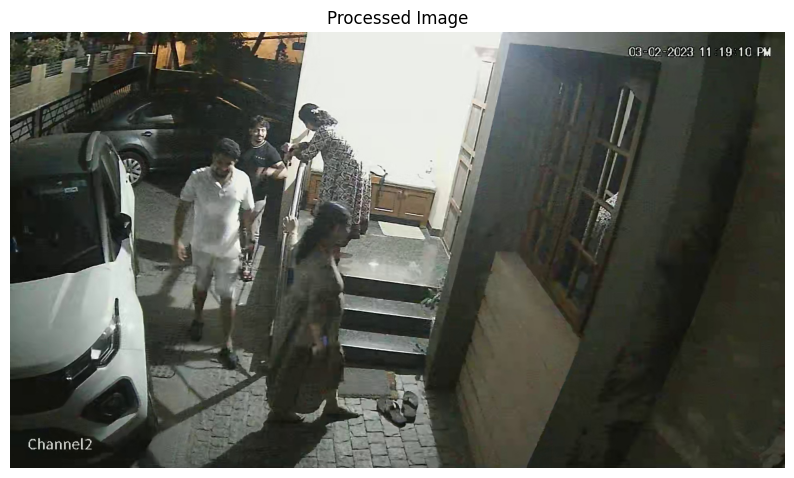

In [ ]:
import cv2
import torch
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load and preprocess the uploaded input image
image_file = "/content/drive/MyDrive/Data/A2/Channel2-Segmentation/FramesWithHumans12/frame_16875.jpg"   # Use the uploaded image path
image = cv2.imread(image_file)
if image is None:
    raise ValueError(f"Failed to load image: {image_file}")

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to tensor format expected by the model
inputs = [{"image": torch.as_tensor(image_rgb.astype("float32").transpose(2, 0, 1))}]

# Pass the image through the model and get the results
with torch.no_grad():
    outputs = model(inputs)  # Assuming model is already loaded and defined

# Post-processing of the model output would depend on the specific model you're using.
# For example, if this is an object detection model, we could visualize the bounding boxes:
# Assuming outputs contain boxes and masks (for object detection or segmentation)

# Visualize the image
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.title("Processed Image")
plt.axis('off')
plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


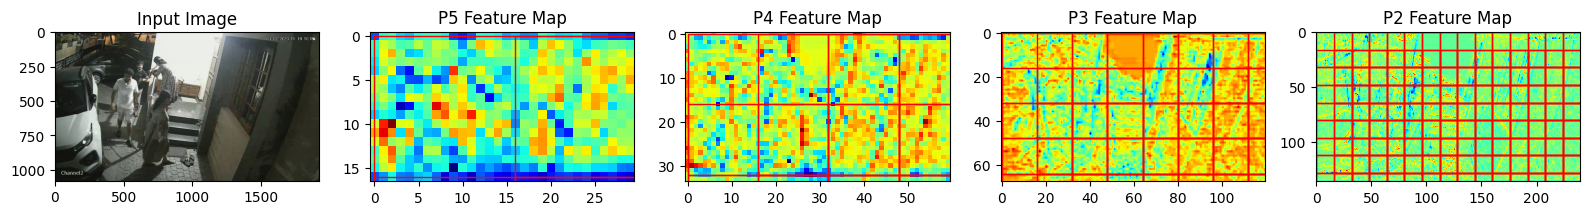

Image shape: (1080, 1920, 3)
Feature map keys: ['P5', 'P4', 'P3', 'P2']
Sample feature map shape (P2): (1, 256, 272, 480)


In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.config import get_cfg
from detectron2 import model_zoo
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

# Load the model configuration and pre-trained weights
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cpu"  # Using CPU for inference

# Build the model and load weights
model = build_model(cfg)
model.eval()  # Set model to evaluation mode
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)

# Register hooks to capture feature maps
feature_maps = {}

def get_activation(name):
    def hook(model, input, output):
        feature_maps[name] = output.detach().cpu().numpy()
    return hook

# Hook the FPN layers (P2 to P6)
model.backbone.fpn_lateral2.register_forward_hook(get_activation('P2'))
model.backbone.fpn_lateral3.register_forward_hook(get_activation('P3'))
model.backbone.fpn_lateral4.register_forward_hook(get_activation('P4'))
model.backbone.fpn_lateral5.register_forward_hook(get_activation('P5'))

# Load and preprocess your input image
image_file = "/content/drive/MyDrive/Data/A2/Channel2-Segmentation/FramesWithHumans12/frame_16875.jpg"
image = cv2.imread(image_file)
if image is None:
    raise ValueError("Image not found. Check the file path.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to the expected format (tensor)
inputs = [{"image": torch.as_tensor(image.astype("float32").transpose(2, 0, 1))}]

# Pass the image through the model
with torch.no_grad():
    model(inputs)

# Visualize the sliding window over the feature maps
def plot_feature_maps_with_sliding_window(feature_maps, num_maps=4):
    plt.figure(figsize=(16, 10))

    # Display the input image
    plt.subplot(2, num_maps + 1, 1)
    plt.imshow(image)
    plt.title('Input Image')

    # For each feature map, visualize the sliding window and corresponding anchors
    for i, (layer, fmap) in enumerate(feature_maps.items(), 2):
        # Taking the average across channels for visualization
        fmap_avg = np.mean(fmap[0], axis=0)

        # Plot the feature map
        plt.subplot(2, num_maps + 1, i)
        fmap_downsampled = cv2.resize(fmap_avg, (fmap_avg.shape[1]//2, fmap_avg.shape[0]//2))  # Downsample
        plt.imshow(fmap_downsampled, cmap='jet')
        plt.title(f"{layer} Feature Map")

        # Simulate sliding window by overlaying boxes
        stride = 16
        window_size = 32

        for y in range(0, fmap_downsampled.shape[0], stride):
            for x in range(0, fmap_downsampled.shape[1], stride):
                rect = plt.Rectangle((x, y), window_size, window_size, edgecolor='red', facecolor='none', lw=1)
                plt.gca().add_patch(rect)

    plt.tight_layout()
    plt.show()

# Plot the feature maps with sliding window
plot_feature_maps_with_sliding_window(feature_maps)

# Print debug info
print(f"Image shape: {image.shape}")
print(f"Feature map keys: {list(feature_maps.keys())}")
if 'P2' in feature_maps:
    print(f"Sample feature map shape (P2): {feature_maps['P2'].shape}")
else:
    print("P2 feature map not captured.")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 148MB/s]


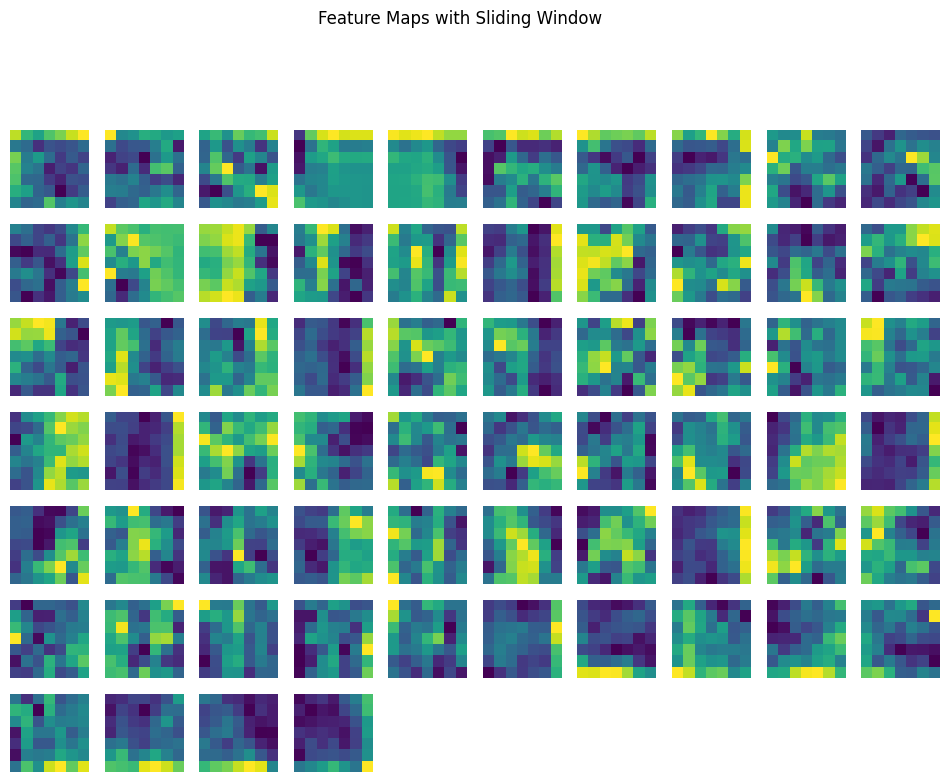

In [ ]:


import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the pre-trained model and set it to evaluation mode
model = models.resnet50(pretrained=True)
model.eval()

# Select the desired layer for feature maps (e.g., 'layer1')
layer = model.layer1

# Define a hook to extract the feature maps
feature_maps = []

def hook(module, input, output):
    feature_maps.append(output)

# Register the hook
hook_handle = layer.register_forward_hook(hook)

# Load and preprocess the image
image_path = "/content/drive/MyDrive/Data/A2/Channel2-Segmentation/FramesWithHumans12/frame_16875.jpg"
image = Image.open(image_path).convert("RGB")
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_image = transform(image).unsqueeze(0)

# Pass the image through the model
with torch.no_grad():
    _ = model(input_image)

# Retrieve and process the feature maps
feature_maps = feature_maps[0].squeeze(0)  # Remove batch dimension

# Define sliding window parameters
window_size = (7, 7)  # Window size for patches
stride = 7            # Stride between patches

# Extract patches and plot them
plt.figure(figsize=(12, 12))
num_patches = 1
for i in range(0, feature_maps.shape[1] - window_size[0] + 1, stride):
    for j in range(0, feature_maps.shape[2] - window_size[1] + 1, stride):
        patch = feature_maps[:, i:i + window_size[0], j:j + window_size[1]]
        patch_image = patch.mean(dim=0).numpy()  # Average over feature channels

        plt.subplot(10, 10, num_patches)
        plt.imshow(patch_image, cmap='viridis')
        plt.axis('off')

        num_patches += 1
        if num_patches > 100:  # Limiting number of patches plotted
            break
    if num_patches > 100:
        break

plt.suptitle("Feature Maps with Sliding Window")
plt.show()

# Clean up hook
hook_handle.remove()


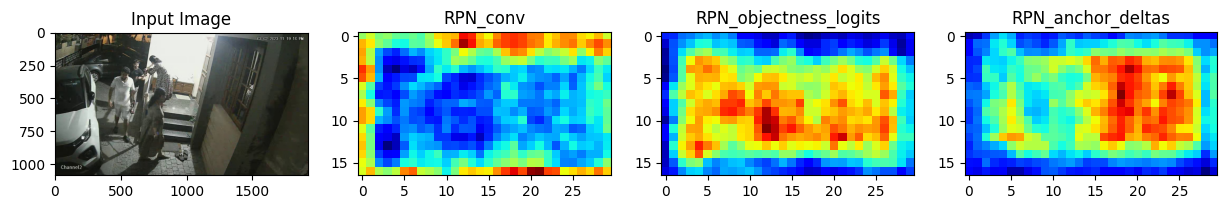

In [ ]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.config import get_cfg
from detectron2 import model_zoo

# Load the model configuration and pre-trained weights
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cpu"  # Set device to CPU for inference (use "cuda" for GPU)

# Build the model and load weights
model = build_model(cfg)
model.eval()  # Set model to evaluation mode
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)

# Register hooks to capture feature maps
feature_maps = {}

def get_activation(name):
    def hook(model, input, output):
        feature_maps[name] = output.detach().cpu().numpy()
    return hook

# Hook into the RPN (Region Proposal Network) layers
model.proposal_generator.rpn_head.conv.register_forward_hook(get_activation('RPN_conv'))
model.proposal_generator.rpn_head.objectness_logits.register_forward_hook(get_activation('RPN_objectness_logits'))
model.proposal_generator.rpn_head.anchor_deltas.register_forward_hook(get_activation('RPN_anchor_deltas'))

# Load and preprocess your input image
image_file = "/content/drive/MyDrive/Data/A2/Channel2-Segmentation/FramesWithHumans12/frame_16875.jpg"

# Check if file exists
if not os.path.exists(image_file):
    raise FileNotFoundError(f"Image file not found: {image_file}")

# Load and preprocess your input image
image = cv2.imread(image_file)
if image is None:
    raise ValueError(f"Failed to load image: {image_file}")

# Convert image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to the expected format (tensor)
inputs = [{"image": torch.as_tensor(image.astype("float32").transpose(2, 0, 1))}]

# Pass the image through the model (this will activate the hooks)
with torch.no_grad():
    model(inputs)

# Visualize the feature maps from RPN
def plot_feature_maps(feature_maps, num_maps=3):
    plt.figure(figsize=(15, 5))

    # Display the input image first
    plt.subplot(1, num_maps + 1, 1)
    plt.imshow(image)
    plt.title('Input Image')

    # Visualize each captured feature map
    for i, (layer, fmap) in enumerate(feature_maps.items(), 2):
        fmap = np.mean(fmap[0], axis=0)  # Average across channels for visualization
        plt.subplot(1, num_maps + 1, i)
        plt.imshow(fmap, cmap='jet')
        plt.title(layer)

    plt.show()

# Plot the captured RPN feature maps
plot_feature_maps(feature_maps)


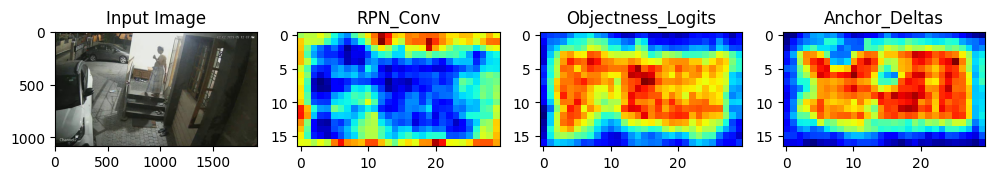

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.config import get_cfg
from detectron2 import model_zoo

# Load the model configuration and pre-trained weights
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cpu"  # Using CPU for inference

# Build the model and load weights
model = build_model(cfg)
model.eval()  # Set model to evaluation mode
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)

# Register hooks to capture RPN layers
rpn_outputs = {}

def get_activation(name):
    def hook(model, input, output):
        rpn_outputs[name] = output.detach().cpu().numpy()
    return hook

# Register hooks for RPN layers
model.proposal_generator.rpn_head.conv.register_forward_hook(get_activation('RPN_Conv'))
model.proposal_generator.rpn_head.objectness_logits.register_forward_hook(get_activation('Objectness_Logits'))
model.proposal_generator.rpn_head.anchor_deltas.register_forward_hook(get_activation('Anchor_Deltas'))

# Load and preprocess your input image
image_file = "/content/drive/MyDrive/Data/A2/Channel2-Segmentation/FramesWithHumans12/frame_16875.jpg"  # Update this path
image = cv2.imread(image_file)
if image is None:
    raise ValueError(f"Failed to load image: {image_file}")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to the expected format (tensor)
inputs = [{"image": torch.as_tensor(image.astype("float32").transpose(2, 0, 1))}]

# Pass the image through the model
with torch.no_grad():
    model(inputs)

# Visualize the RPN feature maps
def plot_rpn_maps(rpn_outputs, num_maps=3):
    plt.figure(figsize=(12, 8))

    # Display the input image
    plt.subplot(2, num_maps + 1, 1)
    plt.imshow(image)
    plt.title('Input Image')

    # Display RPN layer maps
    for i, (layer, fmap) in enumerate(rpn_outputs.items(), 2):
        fmap = np.mean(fmap[0], axis=0)  # Taking the average across channels
        plt.subplot(2, num_maps + 1, i)
        plt.imshow(fmap, cmap='jet')
        plt.title(layer)

    plt.show()

# Plot the extracted RPN maps
plot_rpn_maps(rpn_outputs)


In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.config import get_cfg
from detectron2 import model_zoo

# Load the model configuration and pre-trained weights
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cpu"  # Using CPU for inference

# Build the model and load weights
model = build_model(cfg)
model.eval()  # Set model to evaluation mode
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)

# Register hooks to capture feature maps from specific convolutional layers
activations = {}

def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach().cpu().numpy()
    return hook

# Hook into some convolutional layers of the backbone and FPN
model.backbone.bottom_up.stem.conv1.register_forward_hook(get_activation('conv1'))
model.backbone.bottom_up.res2[0].conv1.register_forward_hook(get_activation('res2_block1_conv1'))
model.backbone.fpn_lateral2.register_forward_hook(get_activation('fpn_lateral2'))
model.backbone.fpn_lateral3.register_forward_hook(get_activation('fpn_lateral3'))

# Load and preprocess your input image
image_file = "/content/drive/MyDrive/Data/A2/Channel2-Segmentation/FramesWithHumans12/frame_16875.jpg"  # Update this path to the correct location of your image
image = cv2.imread(image_file)

# Check if the image was successfully loaded
if image is None:
    raise ValueError(f"Image not found or unable to load: {image_file}")

# Convert image to RGB format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to the expected format (tensor)
inputs = [{"image": torch.as_tensor(image.astype("float32").transpose(2, 0, 1))}]

# Pass the image through the model
with torch.no_grad():
    model(inputs)

# Function to visualize feature maps
def visualize_activations(activations, cols=8):
    for layer_name, feature_map in activations.items():
        num_filters = feature_map.shape[1]
        num_rows = num_filters // cols + 1  # Calculate the number of rows

        plt.figure(figsize=(15, num_rows * 2))
        plt.suptitle(f'Activations/Outputs of {layer_name}')

        for i in range(num_filters):
            plt.subplot(num_rows, cols, i+1)
            plt.imshow(feature_map[0, i], cmap='viridis')
            plt.axis('off')

        plt.show()

# Visualize the captured feature maps
visualize_activations(activations)


In [ ]:
# ============================
# 1. Install Necessary Libraries
# ============================

# Install PyTorch and torchvision
!pip install torch torchvision

# Install additional dependencies
!pip install pyyaml cython

# Install COCO API
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

# Clone the Detectron2 repository and install it
!git clone https://github.com/facebookresearch/detectron2.git
%cd detectron2
!pip install -e .
%cd ..

# ============================
# 2. Import Necessary Libraries
# ============================

import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer, ColorMode
from google.colab import drive

# ============================
# 3. Mount Google Drive
# ============================

drive.mount('/content/drive')

# ============================
# 4. Configure the Detectron2 Model
# ============================

# Initialize configuration
cfg = get_cfg()

# Merge configuration from model zoo
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

# Set threshold for this model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

# Use CPU for inference (Change to "cuda" if GPU is available)
cfg.MODEL.DEVICE = "cpu"

# Load pre-trained weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

# Initialize the predictor
predictor = DefaultPredictor(cfg)

# ============================
# 5. Define Utility Functions
# ============================

def random_color():
    """Generate a random color."""
    return [int(x) for x in np.random.choice(range(256), size=3)]

# ============================
# 6. Define Paths and Subdirectories
# ============================

# Path to the base dataset directory on Google Drive
base_dataset_path = '/content/drive/MyDrive/Data/A2/Channel2/'

# Get all subdirectories in the base dataset directory that start with 'Frames'
subdirectories = [
    os.path.join(base_dataset_path, d) for d in os.listdir(base_dataset_path)
    if os.path.isdir(os.path.join(base_dataset_path, d)) and d.startswith('Frames')
]

# ============================
# 7. Process Each Subdirectory
# ============================

for subdirectory in subdirectories:
    # Load all image paths in the current subdirectory
    image_files = [
        os.path.join(subdirectory, f) for f in os.listdir(subdirectory)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

    # Get the subdirectory name
    subdirectory_name = os.path.basename(subdirectory)

    # Define paths to save processed frames
    processed_frames_with_humans_path = os.path.join(
        base_dataset_path, f"{subdirectory_name}WithHumans/")
    processed_frames_without_humans_path = os.path.join(
        base_dataset_path, f"{subdirectory_name}WithoutHumans/")

    # Ensure directories exist
    os.makedirs(processed_frames_with_humans_path, exist_ok=True)
    os.makedirs(processed_frames_without_humans_path, exist_ok=True)

    print(f"Processing subdirectory: {subdirectory_name} with {len(image_files)} images.")

    # Process each image in the current subdirectory
    for idx, image_file in enumerate(image_files, 1):
        # Read the image
        image = cv2.imread(image_file)

        if image is None:
            print(f"Warning: Unable to read image {image_file}. Skipping.")
            continue

        # Make predictions
        outputs = predictor(image)

        # Extract instances and move to CPU
        instances = outputs["instances"].to("cpu")

        # Filter instances to only include humans (class ID 0 in COCO)
        human_instances = instances[instances.pred_classes == 0]

        if len(human_instances) > 0:
            # Assign a distinct color to each detected person
            colors = [random_color() for _ in range(len(human_instances))]

            # Extract bounding boxes, masks, and scores
            pred_boxes = human_instances.pred_boxes.tensor.numpy()
            pred_masks = human_instances.pred_masks.numpy()
            pred_scores = human_instances.scores.numpy()  # Extract confidence scores

            for i in range(len(human_instances)):
                # Get the bounding box coordinates
                box = pred_boxes[i]
                start_point = (int(box[0]), int(box[1]))
                end_point = (int(box[2]), int(box[3]))
                color = colors[i]

                # Draw the bounding box
                cv2.rectangle(image, start_point, end_point, color, 2)

                # Add text for bounding box coordinates and confidence score
                label = f"{int(pred_scores[i] * 100)}%"  # Format score as a percentage
                cv2.putText(image, label, (start_point[0], start_point[1] - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2, cv2.LINE_AA)

                # Optionally, add the mask
                mask = pred_masks[i]
                colored_mask = np.zeros_like(image)
                colored_mask[:, :] = color
                # Blend the mask with the image
                image = np.where(mask[:, :, np.newaxis], cv2.addWeighted(image, 1.0, colored_mask, 0.5, 0), image)

            # Save the image to the folder for frames with humans
            save_path = os.path.join(
                processed_frames_with_humans_path, os.path.basename(image_file))
        else:
            # Save the image to the folder for frames without humans
            save_path = os.path.join(
                processed_frames_without_humans_path, os.path.basename(image_file))

        # Save the processed image
        cv2.imwrite(save_path, image)

        # (Optional) Display the result for the first few images
        if idx <= 5:
            cv2_imshow(image)

    print(f"Completed processing subdirectory: {subdirectory_name}\n")

print("All subdirectories have been processed.")
